In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
import h5py
import numpy as np
import seaborn as sns
import glob
from dolphin.processor.config import ModelConfig

from scipy import ndimage, misc
import os 
import yaml

In [2]:

def lens_viewer(lens):
    band = []
    for name in glob.glob('../data/{}/image_*'.format(lens)):
        band.append(name[-8:-3])
 
    if "600LP" in band:
        band.remove("600LP")
        band.append("F600LP")    

    band=sorted(band)
    if "F160W" in band:
        band.remove("F160W")
        band.append("F160W")     
    total_num = len(band) 
    
    if total_num == 1:
        b=band[0]
        f = h5py.File('../data/{}/image_{}_{}.h5'.format(lens,lens,b), 'r')
        raw_image = f['image_data'][()]
        f.close()
        
        config = ModelConfig("../settings/{}_config.yml".format(lens))
        mask = (config.get_masks()[0])
        
        image = raw_image * mask
        norm = simple_norm(image, 'sqrt', percent=99.)
        cutout_size = len(image)/2
        plt.plot(cutout_size , cutout_size , 'x', color='k', markersize=10)          
        plt.imshow(image, norm=norm, origin='lower', cmap='viridis')
        plt.title(b)
        plt.show()
        
        
    elif total_num == 0:
        print("No HST Image")
        
    else:    
        fig, ax = plt.subplots(1, total_num,figsize=(5*total_num,5*total_num))
        config = ModelConfig("../settings/{}_config.yml".format(lens))
        a_yaml_file = open("../settings/{}_config.yml".format(lens))
        settings = yaml.load(a_yaml_file, yaml.FullLoader) 
        for i,b in enumerate(band):  

            f = h5py.File('../data/{}/image_{}_{}.h5'.format(lens,lens,b), 'r')
            raw_image = f['image_data'][()]
            f.close()

            index = settings["band"].index(b) 
            mask = (config.get_masks()[index])
            
            image = raw_image * mask
            norm = simple_norm(image, 'sqrt', percent=99.)
            cutout_size = len(image)/2
            ax[i].plot(cutout_size , cutout_size , 'x', color='k', markersize=10)  
            ax[i].imshow(image, norm=norm, origin='lower', cmap='viridis')
            ax[i].title.set_text("{}".format(b))


        plt.show()

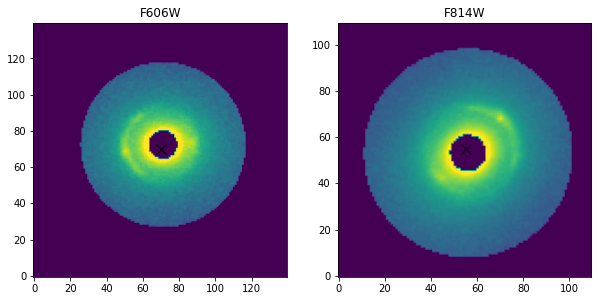

In [3]:
lens_viewer('SDSSJ0029-0055')

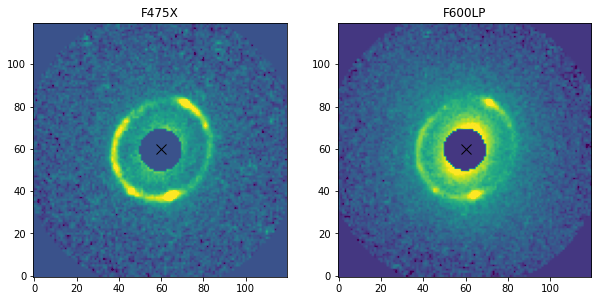

In [4]:
lens_viewer('SL2SJ1411+5651')

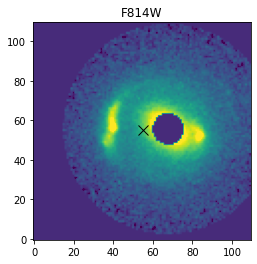

In [5]:
lens_viewer('SDSSJ0830+5116')